<a href="https://colab.research.google.com/github/BeshkiaKvarnstrom/MSDS-Repos/blob/main/Math_HW1_33_BK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
"""
Question #1: Even-Odd Vending Machine
Try writing an “even-odd vending machine,” which will take a number as input and do two things:
1.	Print whether the number is even or odd.
2.	Display the number followed by the next 9 even or odd numbers.

If the input is 2, the program should print even and then print 2, 4, 6,
8, 10, 12, 14, 16, 18, 20. Similarly, if the input is 1, the program should
print odd and then print 1, 3, 5, 7, 9, 11, 13, 15, 17, 19.
Working with Numbers 23
Your program should use the is_integer() method to display an error message if the input is a number with significant digits beyond the decimal point.
"""
def verify_e_o(value):
    value = float(value)
    if value.is_integer():
        if value % 2 == 0:
            print("even")
        else:
            print("odd")
        for i in range(0, 18, 2):
            print(value + i, sep='', end=', ', flush=True)
        print(value + 18, sep='', end='.\n', flush=False)
    else:
        print("error : input is a number with significant digits beyond the decimal point")

if __name__ == '__main__':
    verify_e_o(23.00)


odd
23.0, 25.0, 27.0, 29.0, 31.0, 33.0, 35.0, 37.0, 39.0, 41.0.


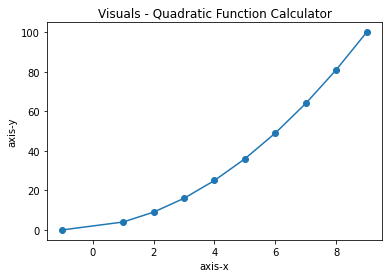

In [47]:
"""
Question #2: Exploring a Quadratic Function Visually
Your programming challenge is to enhance this program to create a graph of the 
function. Try using at least 10 values for x instead of the 6above. Calculate 
the corresponding y values using the function and then create a graph using 
these two sets of values.

Once you’ve created the graph, spend some time analyzing how the
value of y varies with respect to x. Is the variation linear or nonlinear?
"""
import matplotlib.pyplot as plot

def fun_Q():
    val_x = [-1, 1, 2, 3, 4, 5, 6, 7, 8, 9]
    val_y = []
    for x in val_x:
        val_y.append(x**2 + 2*x + 1)
    create_rep_grph(val_x, val_y)


def create_rep_grph(x, y):
    plot.plot(x, y, marker='o')
    plot.xlabel('axis-x')
    plot.ylabel('axis-y')
    plot.title('Visuals - Quadratic Function Calculator')
    plot.show()

    #We found variation - nonlinear

if __name__ == '__main__':
    fun_Q()

In [48]:
"""
Question #3: Statistics Calculator
Implement a statistics calculator that takes a list of numbers in the file
mydata.txt and then calculates and prints their mean, median, mode,
variance, and standard deviation using the functions we wrote earlier in
this chapter.
"""
import matplotlib.pyplot as plot
from collections import Counter

def get_file(file):
    nums = []
    with open(file) as lines:
        for line in lines:
            nums.append(float(line))
    return nums

def get_mean(nums):
    sum_of_nums = sum(nums)
    lenght_of_nums = len(nums)
    mean_value = sum_of_nums / lenght_of_nums
    return mean_value

def get_median(nums):
    lenght_of_nums = len(nums)
    nums.sort()

    if lenght_of_nums % 2 == 0:
        val1 = int(lenght_of_nums / 2) - 1
        val2 = int((lenght_of_nums / 2) + 1) - 1
        final_med = (nums[val1] + nums[val2]) / 2
    else:
        val12 = int((lenght_of_nums + 1) / 2) - 1
        final_med = nums[val12]
    return final_med

def get_mode(nums):
    count = Counter(nums)
    f = count.most_common()
    counted = f[0][1]
    values_mode = []
    for n in f:
        if n[1] == counted:
            values_mode.append(n[0])
    return values_mode


def get_variation(nums):
    n_value = get_mean(nums)
    lt = []
    for n in nums:
        lt.append(n - n_value)
    return lt

def get_variance(nums):
    lt = get_variation(nums)
    l_lt = []
    for n in lt:
        l_lt.append(n**2)
    s_l_lt = sum(l_lt)
    final_var = s_l_lt / len(nums)
    return final_var

if __name__ == '__main__':
    val = get_file('mydata.txt')
    mean_value = get_mean(val)
    median_value = get_median(val)
    mode_value = get_mode(val)
    variance_value = get_variance(val)
    Standard_Deviation_value = variance_value**0.5
    print('Mean: {0}'.format(mean_value))
    print('Median: {0}'.format(median_value))
    print('Mode: {0}'.format(mode_value))
    print('Variance: {0}'.format(variance_value))
    print('Standard Deviation: {0}'.format(Standard_Deviation_value))

Mean: 55.0
Median: 55.0
Mode: [10.0, 20.0, 30.0, 40.0, 50.0, 60.0, 70.0, 80.0, 90.0, 100.0]
Variance: 825.0
Standard Deviation: 28.722813232690143


In [49]:
"""
Question #4: Solving Single-Variable Inequalities
challenge  (1) to create a function, isolve(), that
will take any inequality and (2) to choose one of the appropriate functions
discussed in this section to solve it and return the solution.
"""
import sympy as sym

x,y = sym.symbols('x,y')
eq1 = sym.Eq(x+y,5)
eq2 = sym.Eq(x**2+y**2,17)
result = sym.solve([eq1,eq2],(x,y))
print(result)

[(1, 4), (4, 1)]


In [ ]:
from sympy import Derivative, Symbol, sympify
from sympy.core.sympify import SympifyError

def isolve(x0, f1x, x):
    epsilon = 1e-6
    step_size = 1e-4
    x_old = x0
    x_new = x_old - step_size * f1x.subs({x: x_old}).evalf()
    while abs(x_old - x_new) > epsilon:
        x_old = x_new
        x_new = x_old - step_size * f1x.subs({x: x_old}).evalf()

    return x_new

if __name__ == '__main__':
    f = input('Enter a function in one variable: ')
    var = input('Enter the variable to differentiate with respect to: ')
    var0 = float(input('Enter the initial value of the variable: '))
    try:
        f = sympify(f)
    except SympifyError:
        print('Invalid')
    else:

        var = Symbol(var)
        d = Derivative(f, var).doit()

        var_min = isolve(var0, d, var)
        print('{0}: {1}'.format(var.name, var_min))
        print('Minimum value: {0}'.format(f.subs({var: var_min})))

In [ ]:
"""
Question #5: Law of Large Numbers
According to the law of large numbers, the average value of results over
multiple trials approaches the expected value as the number of trials
increases. 

Your challenge in this task is to verify this law when rolling a
six-sided die for the following number of trials: 100, 1000, 10000, 100000,
and 500000. Here’s an expected sample run of your complete program:
Expected value: 3.5
Trials: 100 Trial average 3.39
Trials: 1000 Trial average 3.576
Trials: 10000 Trial average 3.5054
Trials: 100000 Trial average 3.50201
Trials: 500000 Trial average 3.495568
"""
import random
 
def die_roll(data_list, times):
    total = 0
    for i in range(times):
        num = random.randint(1,6)
        total = total + num
        data_list[num-1] = data_list[num-1] + 1
    average = total * 1.0 / times
    return average  
     
Samp_trials = [100, 1000, 10000, 10000, 100000, 500000]
times = 1000 # throw a die n times
average = die_roll(Samp_trials,times)

print ('The average is',average)

for trial in Samp_trials:
        avg = die_roll(Samp_trials,times)
        print('# Rolls: {0} Roll average {1}'.format(trial, avg))

In [ ]:
"""
Question #6: Implement the Gradient Descent
Implement a generic program using the gradient descent algorithm to find
the minimum value of a single-variable function specified as input by the 
user. The program should also create a graph of the function and show 
all the intermediate values it found before finding the minimum.
"""
from sympy import Derivative, Symbol, sympify
from sympy.core.sympify import SympifyError

def gradient_des(x0, f1x, x):
    epsilon = 1e-6
    step_size = 1e-4
    x_old = x0
    x_new = x_old - step_size * f1x.subs({x: x_old}).evalf()
    while abs(x_old - x_new) > epsilon:
        x_old = x_new
        x_new = x_old - step_size * f1x.subs({x: x_old}).evalf()

    return x_new

if __name__ == '__main__':
    f = input('Enter a function in one variable: ')
    var = input('Enter the variable to differentiate with respect to: ')
    var0 = float(input('Enter the initial value of the variable: '))
    try:
        f = sympify(f)
    except SympifyError:
        print('Invalid function entered')
    else:

        var = Symbol(var)
        d = Derivative(f, var).doit()

        var_min = gradient_des(var0, d, var)
        print('{0}: {1}'.format(var.name, var_min))
        print('Minimum value: {0}'.format(f.subs({var: var_min})))